<a href="https://colab.research.google.com/github/Purvi9399/FISH_CLASSIFIER/blob/master/FISHCLASSIFIER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
assert tf.__version__.startswith('2')
from tensorflow import keras
from  tensorflow.keras import layers
import os
import numpy as np
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

data_root  = '/content/gdrive/"My Drive"/Fish'
!ls {data_root}

Mounted at /content/gdrive
Alaska_Pollock	Common_carp  Nile_tilapia	    Silver_carp
Bighead_carp	crabs	     Sharks		    Swordfish
Butterfly_fish	Gold_fish    Siamese_fighting_fish  Tuna_fish


In [ ]:
base_dir = '/content/gdrive/My Drive/Fish'

In [ ]:
IMAGE_SIZE = 224
BATCH_SIZE = 64

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2)

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    subset='training')

val_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    subset='validation')

Found 1495 images belonging to 12 classes.
Found 367 images belonging to 12 classes.


In [ ]:
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


((64, 224, 224, 3), (64, 12))

In [ ]:
print (train_generator.class_indices)

labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('labels.txt', 'w') as f:
  f.write(labels)

{'Alaska_Pollock': 0, 'Bighead_carp': 1, 'Butterfly_fish': 2, 'Common_carp': 3, 'Gold_fish': 4, 'Nile_tilapia': 5, 'Sharks': 6, 'Siamese_fighting_fish': 7, 'Silver_carp': 8, 'Swordfish': 9, 'Tuna_fish': 10, 'crabs': 11}


In [ ]:
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                              include_top=False, 
                                              weights='imagenet')

In [ ]:
base_model.trainable = False

In [ ]:
model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(12, activation='softmax')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 5, 5, 32)          368672    
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)                396       
Total params: 2,627,052
Trainable params: 369,068
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
print('Number of trainable variables = {}'.format(len(model.trainable_variables)))

Number of trainable variables = 4


In [ ]:
epochs = 10

history = model.fit(train_generator, 
                    steps_per_epoch=len(train_generator), 
                    epochs=epochs, 
                    validation_data=val_generator, 
                    validation_steps=len(val_generator))

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Epoch 1/10
16/24 [===================>..........] - ETA: 19s - loss: 2.2753 - accuracy: 0.2940

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


24/24 [==============================] - 84s 3s/step - loss: 2.0293 - accuracy: 0.3605 - val_loss: 1.2745 - val_accuracy: 0.5940
Epoch 2/10
24/24 [==============================] - 83s 3s/step - loss: 1.1755 - accuracy: 0.6341 - val_loss: 0.9289 - val_accuracy: 0.7193
Epoch 3/10
24/24 [==============================] - 83s 3s/step - loss: 0.8565 - accuracy: 0.7117 - val_loss: 0.8804 - val_accuracy: 0.7439
Epoch 4/10
24/24 [==============================] - 84s 4s/step - loss: 0.6595 - accuracy: 0.7706 - val_loss: 0.9465 - val_accuracy: 0.7275
Epoch 5/10
24/24 [==============================] - 84s 3s/step - loss: 0.5840 - accuracy: 0.7980 - val_loss: 0.8988 - val_accuracy: 0.7602
Epoch 6/10
24/24 [==============================] - 84s 4s/step - loss: 0.4932 - accuracy: 0.8281 - val_loss: 0.9888 - val_accuracy: 0.7602
Epoch 7/10
24/24 [==============================] - 90s 4s/step - loss: 0.4513 - accuracy: 0.8448 - val_loss: 0.9638 - val_accuracy: 0.7766
Epoch 8/10
24/24 [=============

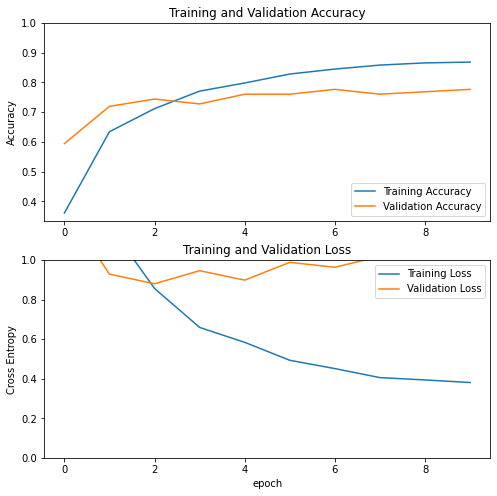

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
base_model.trainable = True

In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  155


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(1e-5),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 5, 5, 32)          368672    
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)                396       
Total params: 2,627,052
Trainable params: 2,231,660
Non-trainable params: 395,392
_________________________________________________________________


In [ ]:
print('Number of trainable variables = {}'.format(len(model.trainable_variables)))

Number of trainable variables = 60


In [ ]:
history_fine = model.fit(train_generator, 
                         steps_per_epoch=len(train_generator), 
                         epochs=50, 
                         validation_data=val_generator, 
                         validation_steps=len(val_generator))

Epoch 1/50
 1/24 [>.............................] - ETA: 0s - loss: 0.5712 - accuracy: 0.7969

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


 6/24 [======>.......................] - ETA: 1:09 - loss: 0.7808 - accuracy: 0.7396

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


24/24 [==============================] - 122s 5s/step - loss: 0.6806 - accuracy: 0.7599 - val_loss: 1.0750 - val_accuracy: 0.7711
Epoch 2/50
24/24 [==============================] - 123s 5s/step - loss: 0.5619 - accuracy: 0.8100 - val_loss: 1.0966 - val_accuracy: 0.7711
Epoch 3/50
24/24 [==============================] - 120s 5s/step - loss: 0.5126 - accuracy: 0.8241 - val_loss: 1.0980 - val_accuracy: 0.7738
Epoch 4/50
24/24 [==============================] - 121s 5s/step - loss: 0.4839 - accuracy: 0.8334 - val_loss: 1.1052 - val_accuracy: 0.7766
Epoch 5/50
24/24 [==============================] - 123s 5s/step - loss: 0.4436 - accuracy: 0.8488 - val_loss: 1.1047 - val_accuracy: 0.7711
Epoch 6/50
24/24 [==============================] - 120s 5s/step - loss: 0.4248 - accuracy: 0.8582 - val_loss: 1.1081 - val_accuracy: 0.7766
Epoch 7/50
24/24 [==============================] - 122s 5s/step - loss: 0.4159 - accuracy: 0.8622 - val_loss: 1.1097 - val_accuracy: 0.7766
Epoch 8/50
24/24 [======

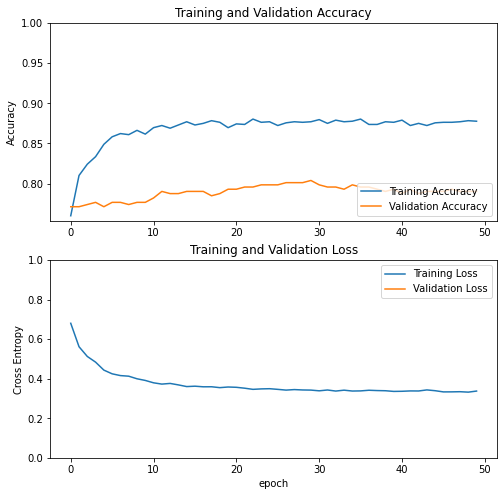

In [ ]:
acc = history_fine.history['accuracy']
val_acc = history_fine.history['val_accuracy']

loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
saved_model_dir = 'save/fine_tuning'
tf.saved_model.save(model, saved_model_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: save/fine_tuning/assets


INFO:tensorflow:Assets written to: save/fine_tuning/assets


In [ ]:
from google.colab import files

files.download('model.tflite')
files.download('labels.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>